# model Test

## e_total Model Test:

In [3]:
# 加载数据
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

TEST_SIZE = 0.3
RANDOM_STATE = 42

X_scaled = np.load('../data/X_scaled.npy')
y_df = pd.read_csv('../data/y.csv')
y_e_total = y_df['e_total'].values
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_e_total, test_size=TEST_SIZE, random_state=RANDOM_STATE)

In [7]:
# 搭建神经网络
import torch
import torch.nn as nn
# 导入optim
import torch.optim as optim

class NN_model(nn.Module):
    def __init__(self):
        super(NN_model, self).__init__()
        
        # 使用Sequential定义神经网络的结构
        self.layers = nn.Sequential(
            nn.Linear(17, 9),
            nn.ReLU(),
            nn.Linear(9, 5),
            nn.ReLU(),
            nn.Linear(5, 1)
        )
        
    def forward(self, x):
        # 前向传播
        return self.layers(x)

In [25]:
# 实例化模型
model = NN_model()
model.load_state_dict(torch.load('NN_model_e_total.pth'))

<All keys matched successfully>

In [26]:
X_test.shape

(2184, 17)

In [27]:
y_pred = model(torch.tensor(X_test, dtype=torch.float32)).detach().numpy().flatten()

In [28]:
from matplotlib import pyplot as plt
def parity_plot(y, y_pred, e_class):
    '''绘制parity_plot图'''
    fig, ax = plt.subplots(dpi=300)
    ax.scatter(y, y_pred, s=1)
    ax.plot(y, y, c='k', zorder=-5)
    ax.set_xlabel('Actual $\epsilon_{e_class}$')
    ax.set_ylabel('Predicted $\epsilon_{e_class}$')
    # ax.set_xscale('log')
    # ax.set_yscale('log')
    ax.set_xlim(0, 200)
    ax.set_ylim(0, 200)
    plt.show()

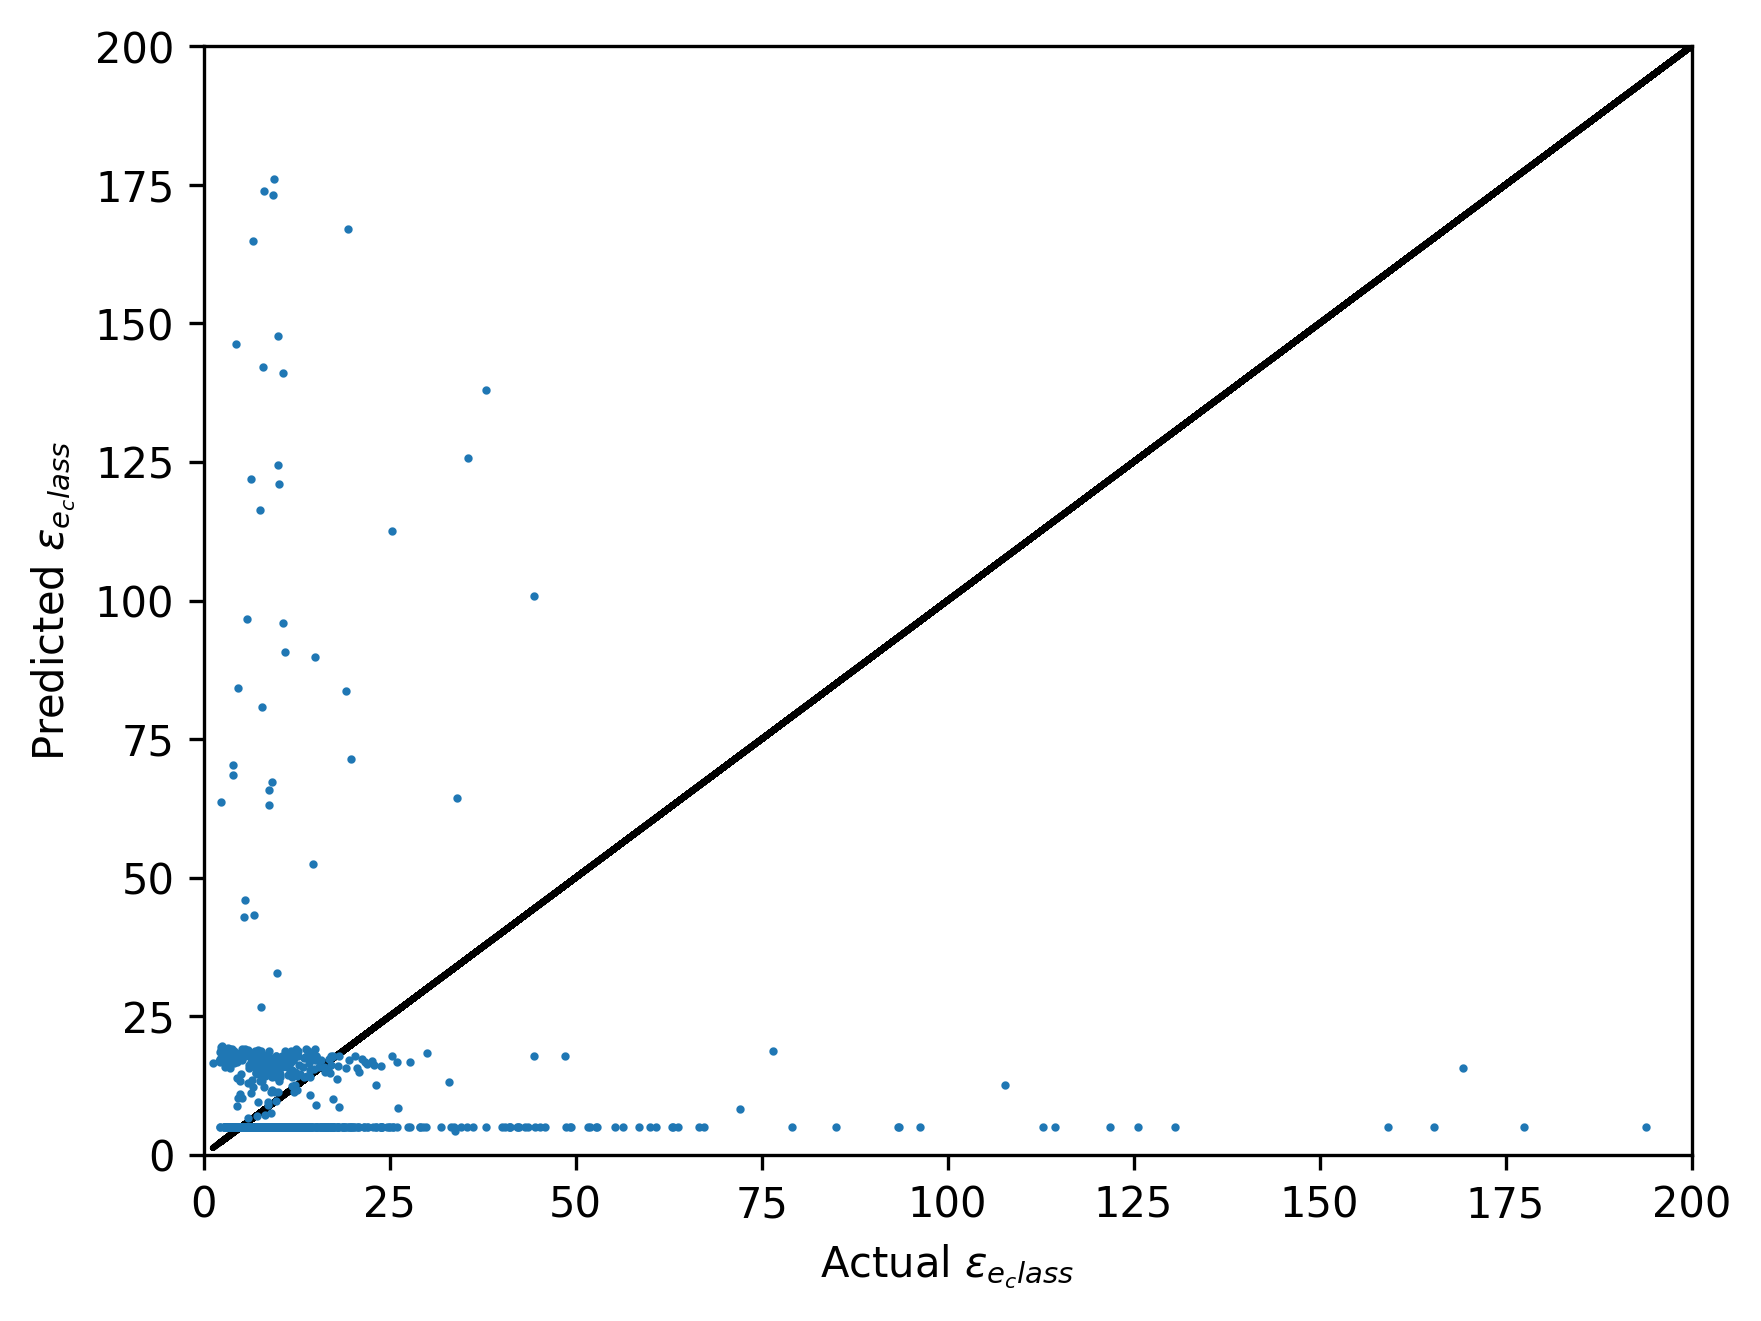

In [29]:
parity_plot(y_test, y_pred, 'total')

In [30]:
from sklearn.metrics import mean_squared_error
# 计算mse
mse = mean_squared_error(y_test, y_pred, squared=False)
mse

10708.757065746391

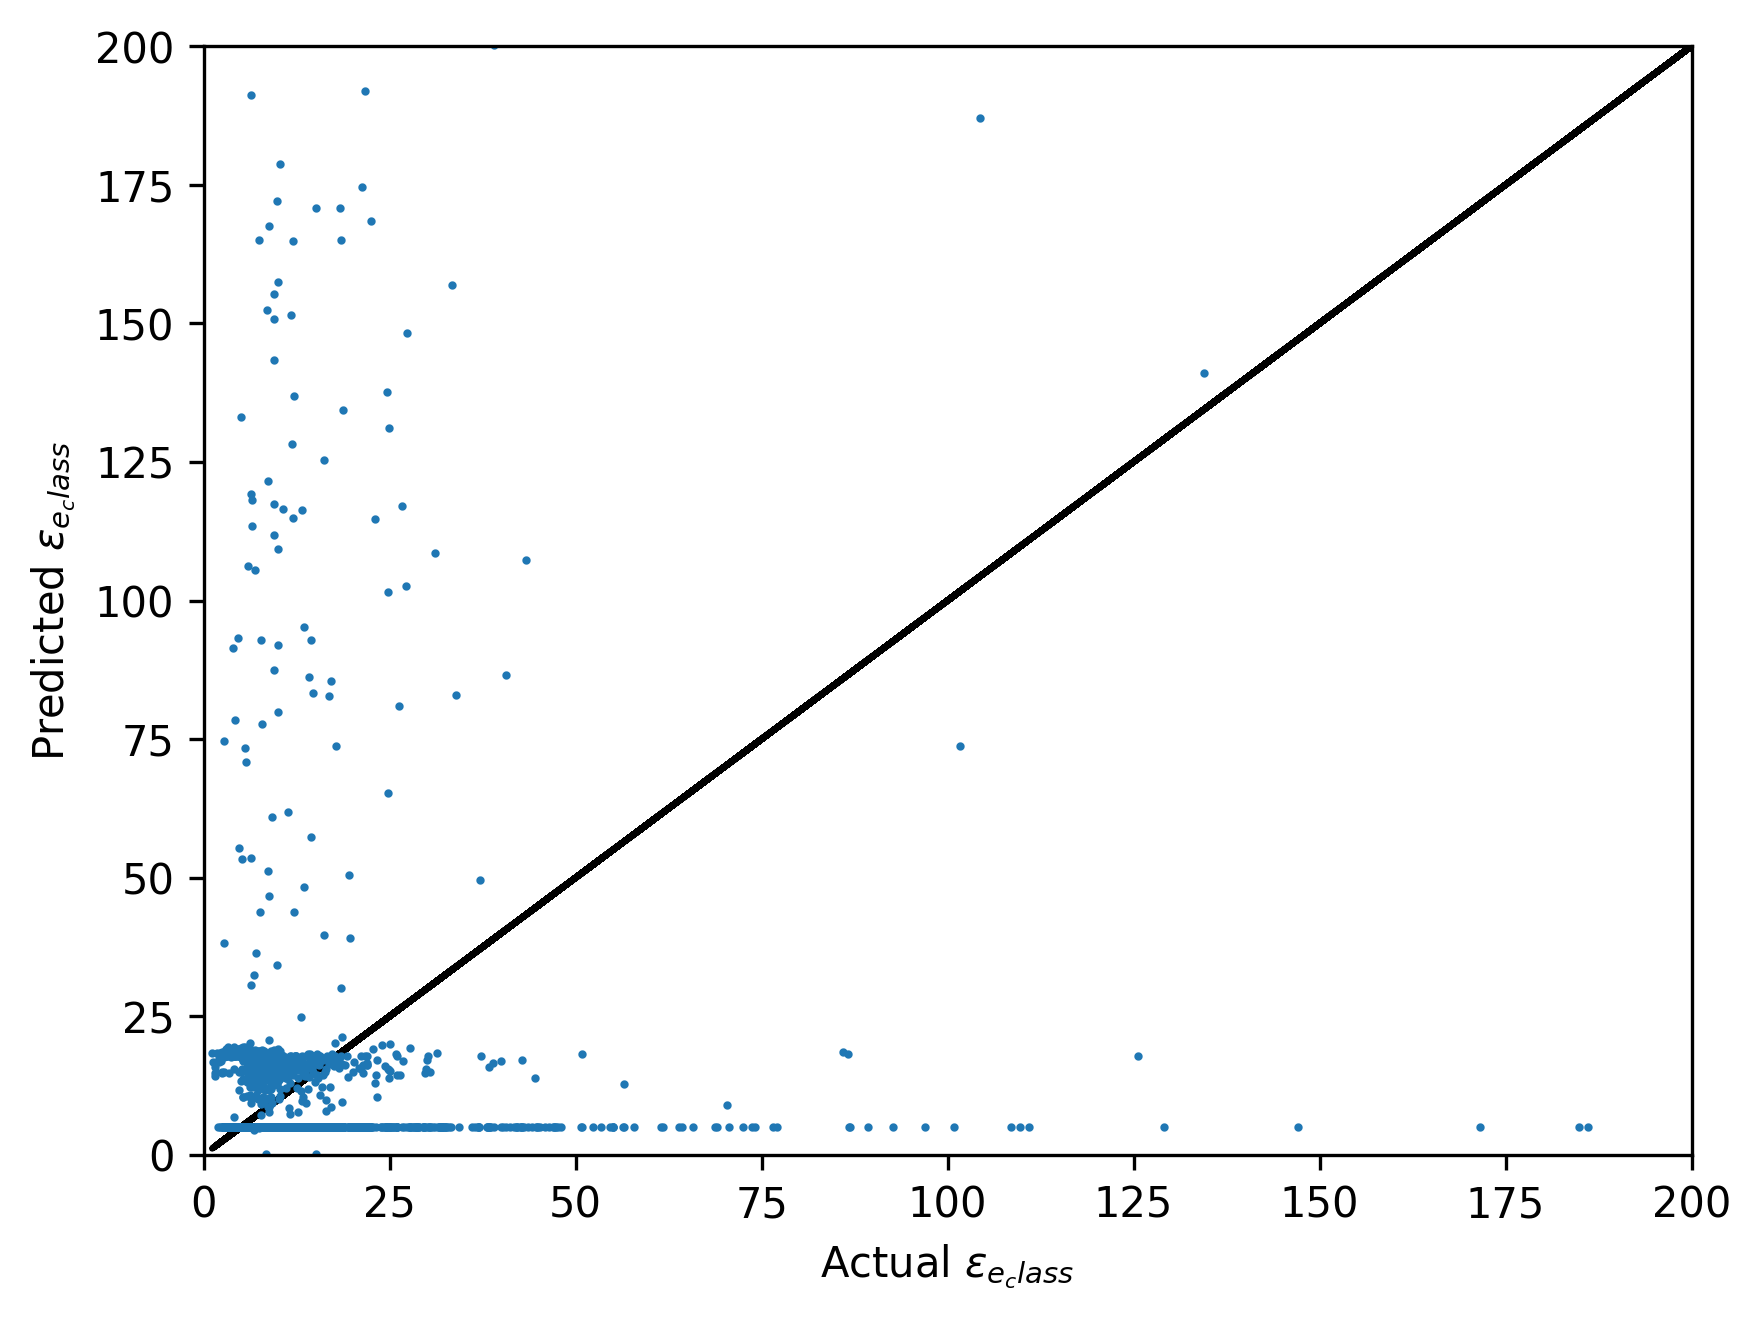

10397.305138934322

In [31]:
### 再看一下训练集的mse等
y_train_pred = model(torch.tensor(X_train, dtype=torch.float32)).detach().numpy().flatten()
parity_plot(y_train, y_train_pred, 'total')
# 计算mse
mse = mean_squared_error(y_train, y_train_pred, squared=False)
mse

## e_electronic Model Test


In [32]:
y_e_electronic = y_df['e_electronic'].values
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_e_electronic, test_size=TEST_SIZE, random_state=RANDOM_STATE)

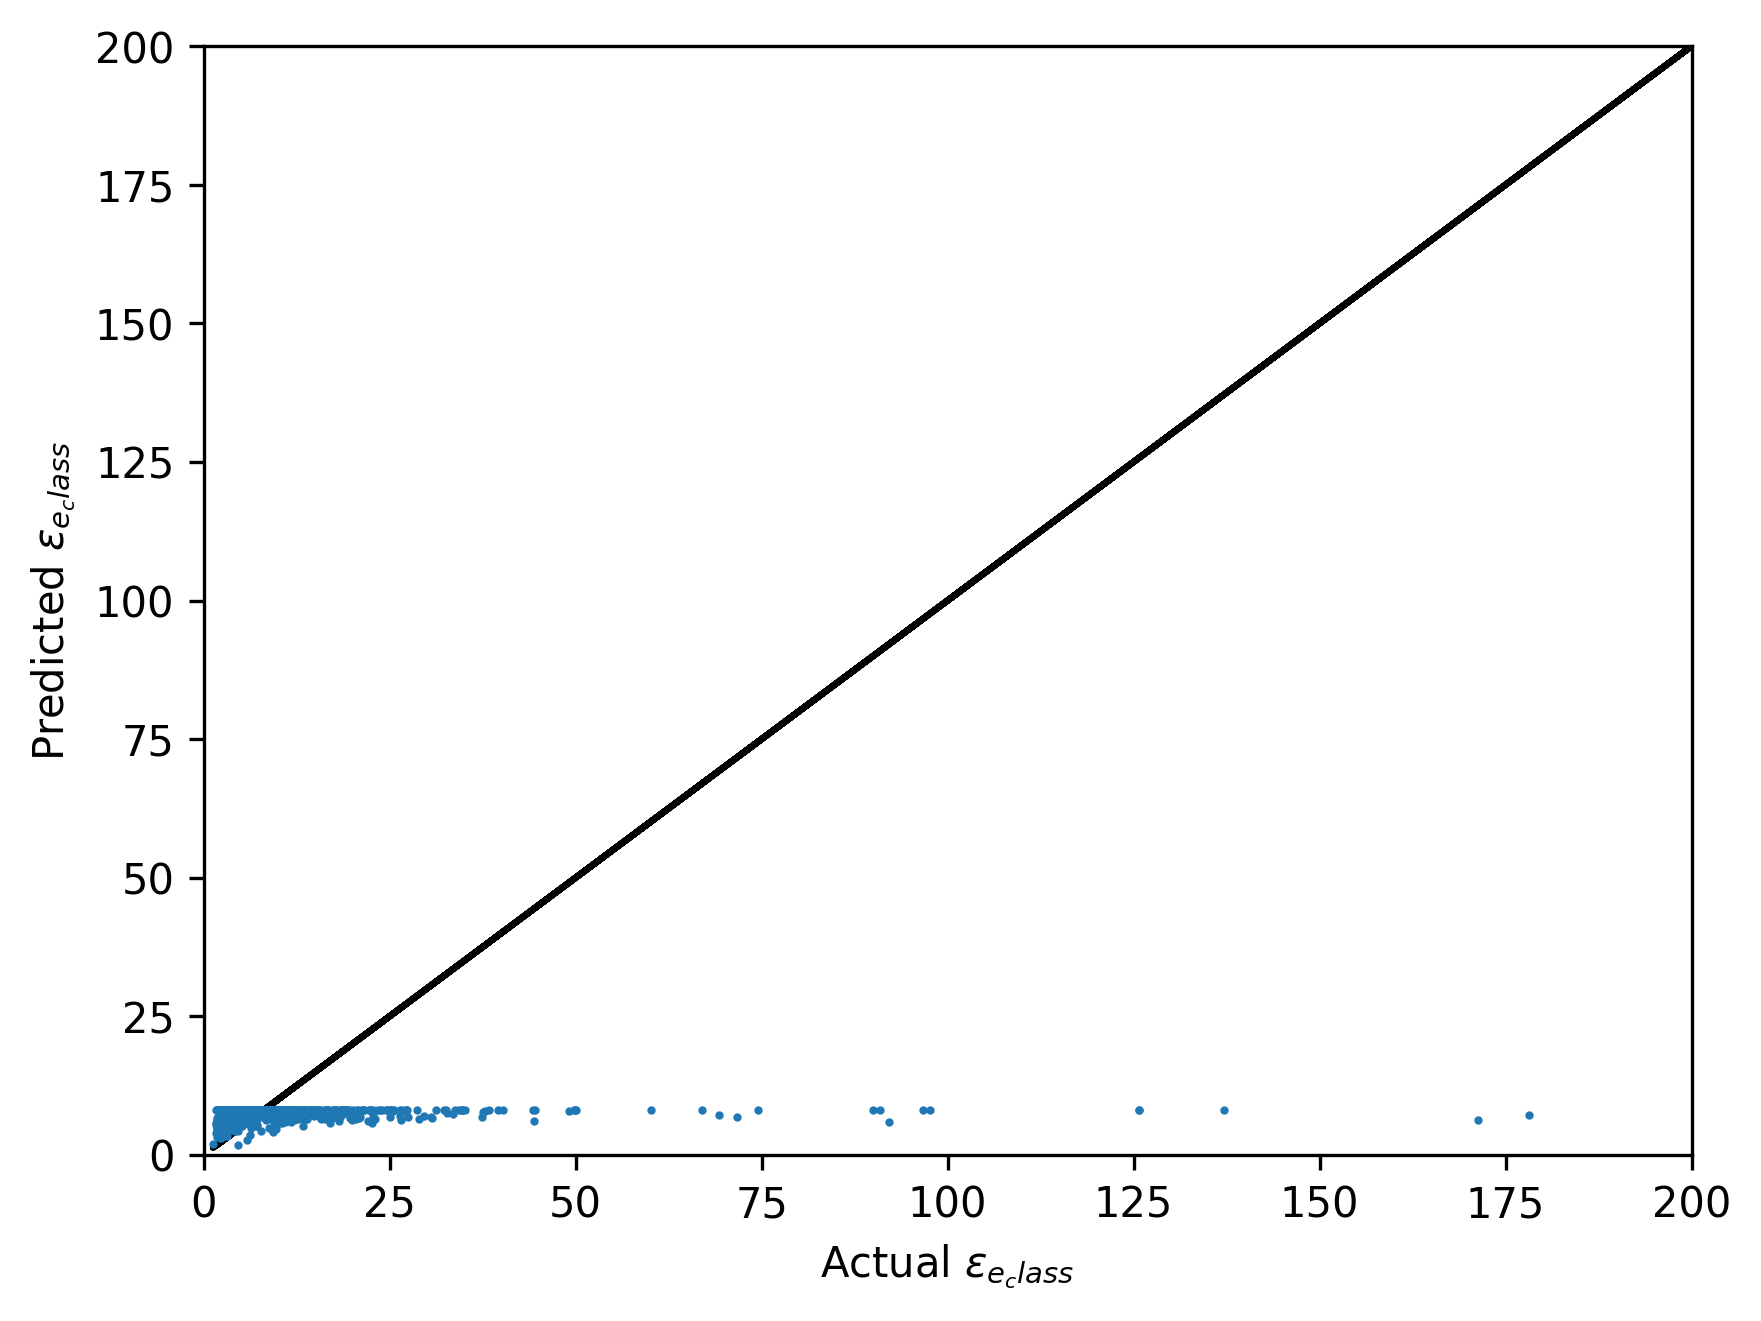

950.3035126953787

In [33]:
# 实例化模型
model_electronic = NN_model()
model_electronic.load_state_dict(torch.load('NN_model_e_electronic.pth'))

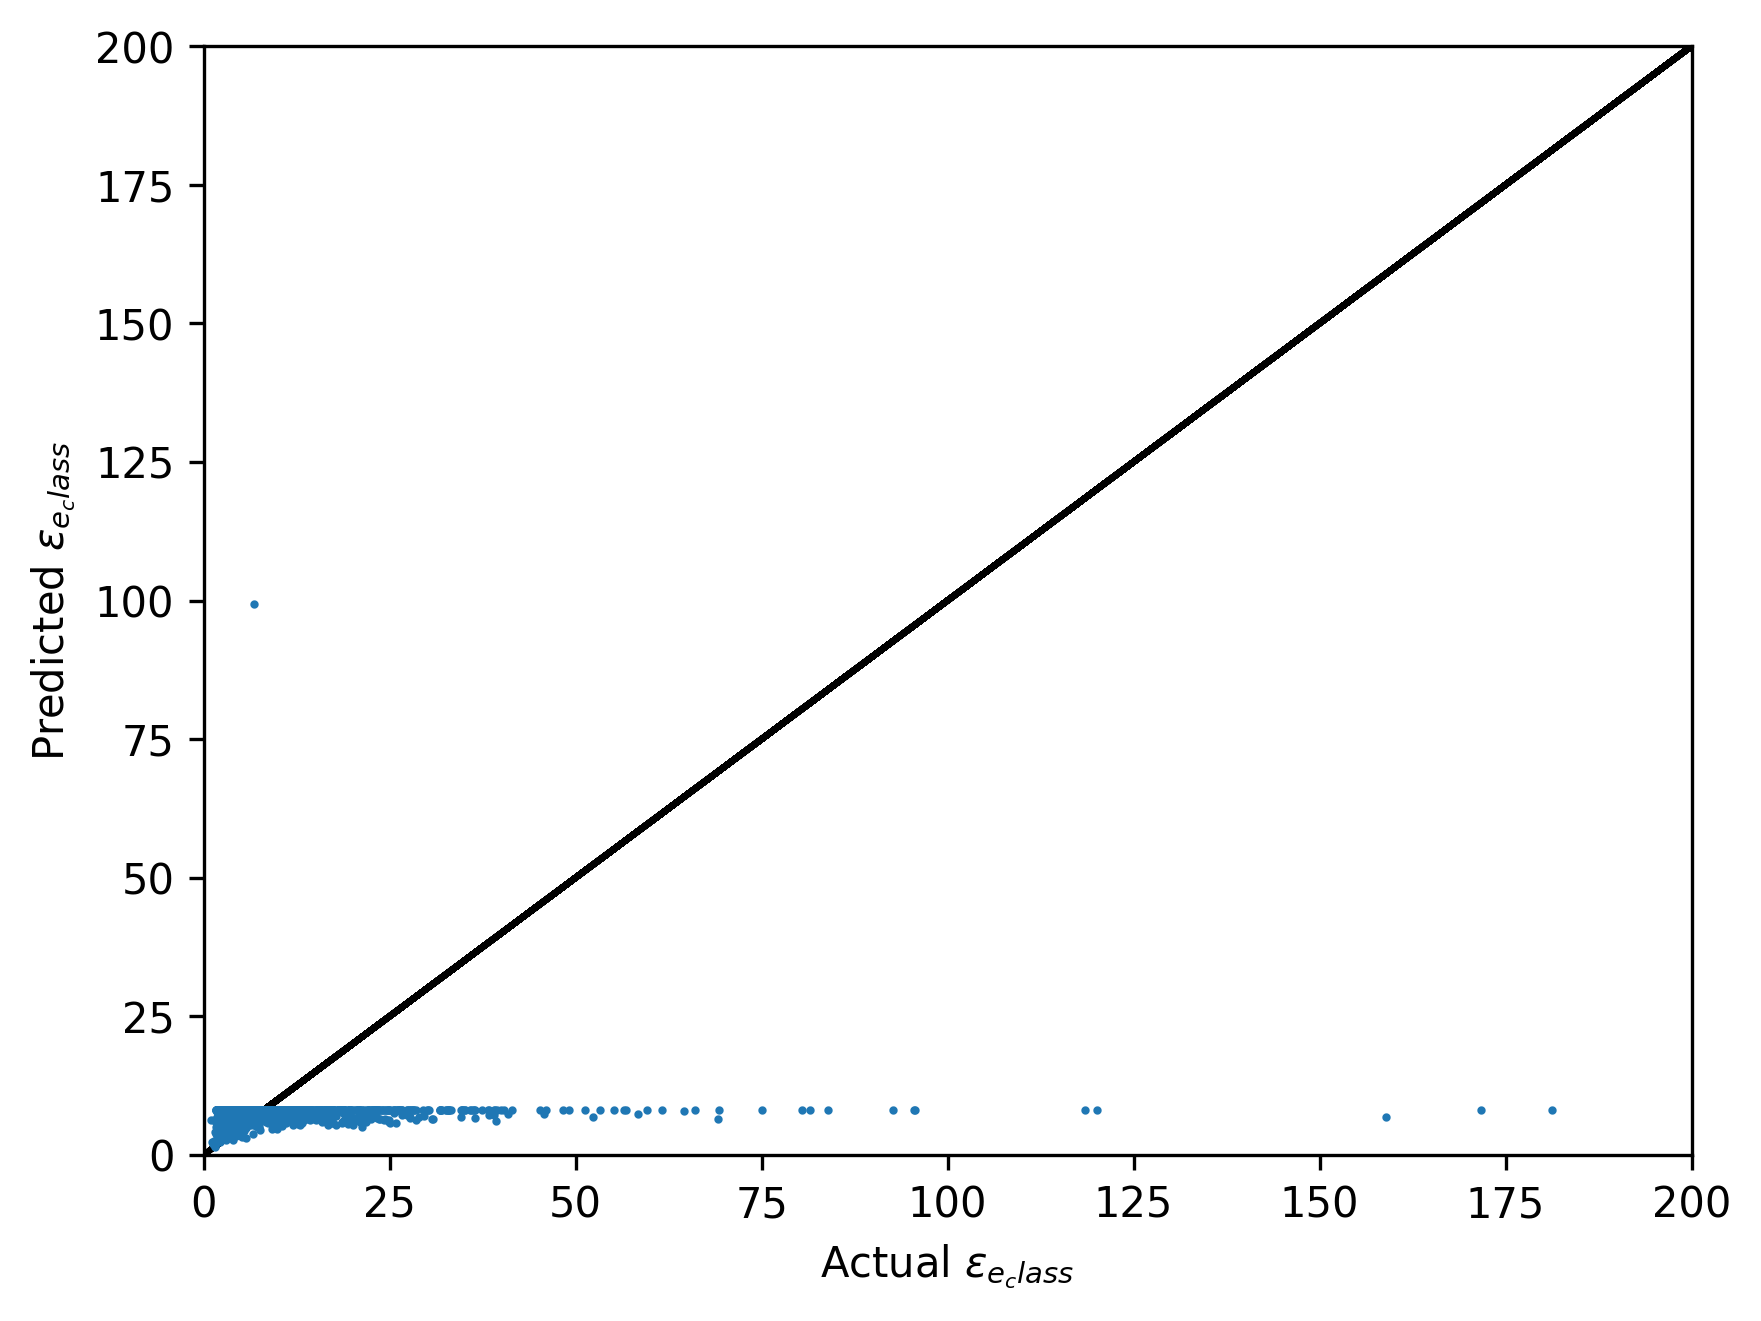

64.11079967870606

In [34]:
y_train_pred = model_electronic(torch.tensor(X_train, dtype=torch.float32)).detach().numpy().flatten()
parity_plot(y_train, y_train_pred, 'total')
# 计算mse
mse = mean_squared_error(y_train, y_train_pred, squared=False)
mse